In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [78]:
workbook = pd.ExcelFile('Offenses_data.xlsx')
d = dict()
for sheet in workbook.sheet_names:
    df = workbook.parse(sheet)
    d[sheet] = df
df.head()

,Name(both parties),term(year of case),first_party,second_party,facts,fact_length,majority_vote,minority_vote,first_party winner,decision_type,disposition,issue areas,type of crime,offence_section,punishment_section,Unnamed: 15,Unnamed: 16
0,Usman v The State,2008,Usman,The State,"criminal conspiracy, abetment and culpable hom...",769,Guilty,Guilty,False,Bench Trial,convicted,capital offence,murder,316 CriminalCode,319 CriminalCode,NaN,NaN
1,Maijamaa vs State,1964,Maijamaa,The State,attack on the deceased,450,Guilty,Not Guilty,False,Jury Trial,convicted,capital offence,murder,221(b) PenalCode,79 PenalCode,NaN,NaN
2,Mbang Efoli Mbang V The State,2009,Mbang Efoli Mbang,The State,ate human flesh,685,Not Guilty,Not Guilty,True,Bench Trial,acquitted,capital offence,murder,316 CriminalCode,319 CriminalCode,NaN,NaN
3,Ibrahim v State,1994,Ibrahim,The State,armed with offensive weapon,651,Guilty,Guilty,False,Bench Trial,convicted,capital offence,armed robbery,402(2),402(2)(b),NaN,NaN
4,Makanjuola v State,2021,Makanjuola,The State,armed with offensive weapon,402,Guilty,Guilty,False,Bench Trial,convicted,capital offence,armed robbery,402(2),402(2)(b),NaN,NaN


In [79]:
df.shape

(1006, 17)

In [80]:
df.describe()

,term(year of case),fact_length
count,1006.000000,1006.000000
mean,2008.133201,1315.297217
std,8.923007,269.351682
min,1964.000000,402.000000
25%,2003.000000,1100.000000
50%,2010.000000,1300.000000
75%,2015.000000,1500.000000
max,2021.000000,1800.000000


In [81]:
df.isnull().sum()

Name(both parties)      0
term(year of case)      0
first_party             0
second_party            0
facts                   1
fact_length             0
majority_vote           0
minority_vote           0
first_party winner      0
decision_type           0
disposition             0
issue areas             0
type of crime           0
offence_section        27
punishment_section     27
Unnamed: 15           953
Unnamed: 16           953
dtype: int64

In [82]:
df.dtypes

Name(both parties)    object
term(year of case)     int64
first_party           object
second_party          object
facts                 object
fact_length            int64
majority_vote         object
minority_vote         object
first_party winner      bool
decision_type         object
disposition           object
issue areas           object
type of crime         object
offence_section       object
punishment_section    object
Unnamed: 15           object
Unnamed: 16           object
dtype: object

In [83]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis='columns', inplace=True)
df.sample(5)

,Name(both parties),term(year of case),first_party,second_party,facts,fact_length,majority_vote,minority_vote,first_party winner,decision_type,disposition,issue areas,type of crime,offence_section,punishment_section
223,State v. Udeh,2006,State of Nigeria,Chinwe Udeh,Kidnapping: Abduction of a foreign diplomat,1700,Not Guilty,Guilty,False,Bench Trial,acquitted,capital offence,kidnapping,364 CriminalCode,364 CriminalCode
154,State v. Onwuka,2001,State of Nigeria,Chioma Onwuka,Treachery: Betraying confidential corporate in...,1200,Guilty,Guilty,True,Bench Trial,sentenced,capital offence,espionage,37 CriminalCode,37 CriminalCode
608,State v. Adeleke,2011,State of Nigeria,Adesuwa Adeleke,Kidnapping: Abduction of a high-profile indivi...,1400,Not Guilty,Guilty,False,Jury Trial,acquitted,capital offence,kidnapping,364 CriminalCode,364 CriminalCode
977,Okunde Kolawole v The State,2017,kolawole,The State,two count charge of conspiracy to commit armed...,1000,Guilty,Guilty,False,Bench Trial,convicted,capital offence,armed robbery,1(2)(a) Robbery and Firearms Act,1(2)(a) Robbery and Firearms Act
459,Edwin Ezigbo v The State,2012,Edwin Ezigbo,The State,offence of rape,1210,Guilty,Guilty,False,Bench Trial,convicted,capital offence,rape,282(1) PenalCode,282(1) PenalCode


In [84]:
df['first_party winner'] = df['first_party winner'].astype(int)

In [85]:
df1 = df[['decision_type','disposition','type of crime','majority_vote','minority_vote','first_party winner']]
df1.head()

,decision_type,disposition,type of crime,majority_vote,minority_vote,first_party winner
0,Bench Trial,convicted,murder,Guilty,Guilty,0
1,Jury Trial,convicted,murder,Guilty,Not Guilty,0
2,Bench Trial,acquitted,murder,Not Guilty,Not Guilty,1
3,Bench Trial,convicted,armed robbery,Guilty,Guilty,0
4,Bench Trial,convicted,armed robbery,Guilty,Guilty,0


In [86]:
df1.isnull().sum()

decision_type         0
disposition           0
type of crime         0
majority_vote         0
minority_vote         0
first_party winner    0
dtype: int64

In [87]:
df1['decision_type'].unique()

array(['Bench Trial', 'Jury Trial'], dtype=object)

In [88]:
df1['disposition'].unique()

array(['convicted', 'acquitted', 'appeal allowed but conviction',
       'sentenced', 'setenced '], dtype=object)

In [89]:
df1 = df1[df1.disposition.values != 'setenced ']

In [90]:
df1['disposition'].unique()

array(['convicted', 'acquitted', 'appeal allowed but conviction',
       'sentenced'], dtype=object)

In [91]:
df1['first_party winner'].unique()

array([0, 1])

In [92]:
df1['type of crime'].unique()

array(['murder', 'armed robbery', 'treason', 'rape', 'manslaughter',
       'homicide', 'robbery', 'kidnapping', 'espionage'], dtype=object)

In [216]:
df2 = df1.groupby('disposition')['type of crime'].agg('count')
df2

disposition
acquitted                        253
appeal allowed but conviction      7
convicted                        277
sentenced                        461
Name: type of crime, dtype: int64

<Axes: title={'center': 'crime cases'}, xlabel='disposition', ylabel='number of deposition'>

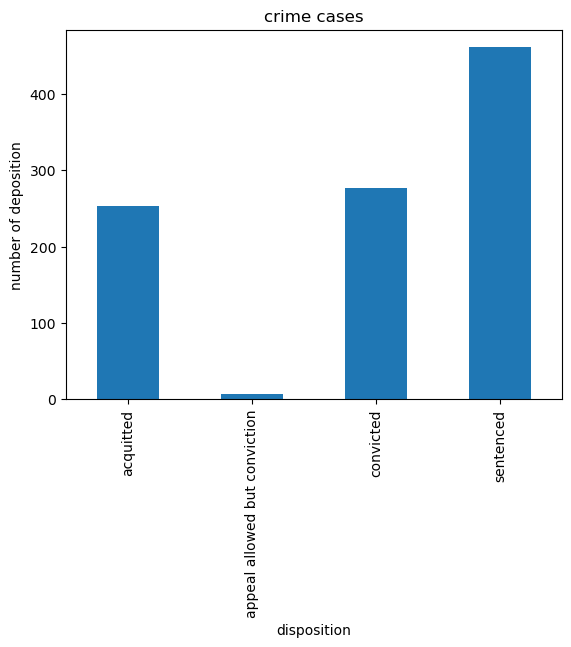

In [94]:
df2.plot(kind='bar',
         xlabel='disposition',
         ylabel='number of deposition',
         title='crime cases',
        )


<Axes: >

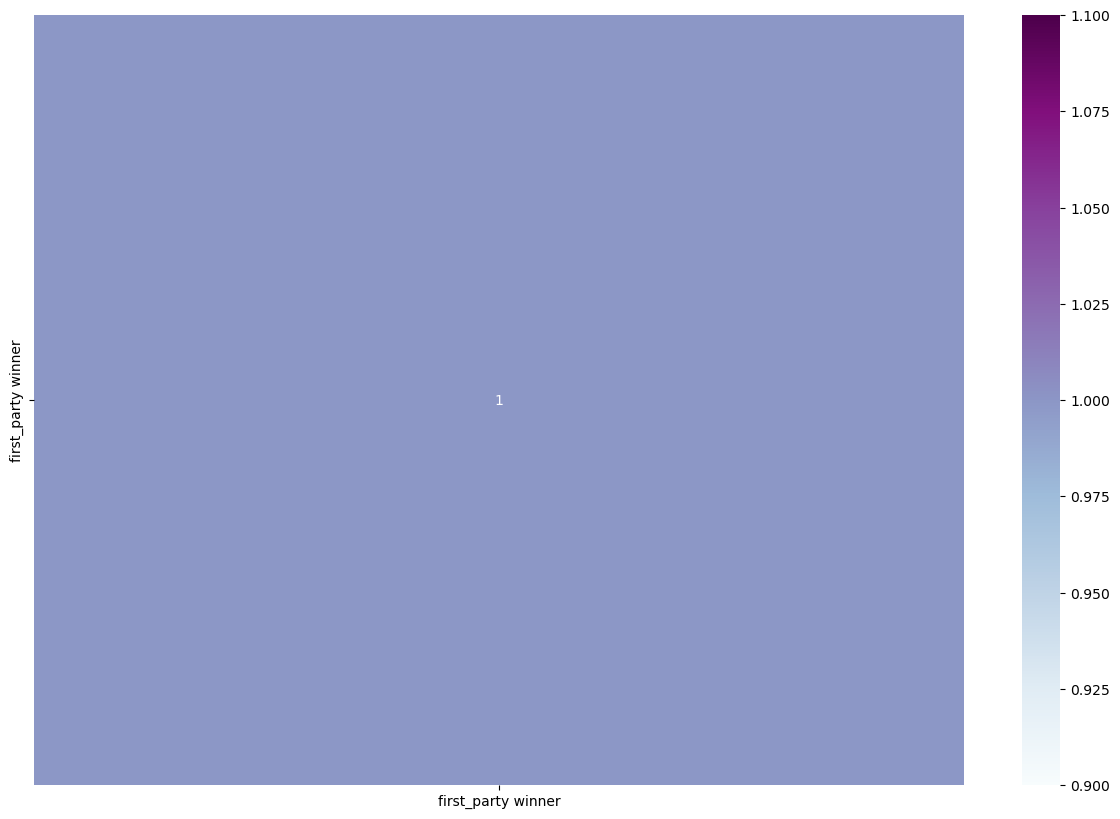

In [95]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [111]:
col = ['decision_type','type of crime','majority_vote','minority_vote','first_party winner']
df3 = pd.get_dummies(data=df1, columns=col, drop_first=True)

In [130]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['disposition'] = label_encoder.fit_transform(df3['disposition'])

In [131]:
df3.head()

,disposition,decision_type_Jury Trial,type of crime_espionage,type of crime_homicide,type of crime_kidnapping,type of crime_manslaughter,type of crime_murder,type of crime_rape,type of crime_robbery,type of crime_treason,majority_vote_Not Guilty,minority_vote_Not Guilty,first_party winner_1
0,2,0,0,0,0,0,1,0,0,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,1,1,1
3,2,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
df3.dtypes

disposition                   int64
decision_type_Jury Trial      int64
type of crime_espionage       int64
type of crime_homicide        int64
type of crime_kidnapping      int64
type of crime_manslaughter    int64
type of crime_murder          int64
type of crime_rape            int64
type of crime_robbery         int64
type of crime_treason         int64
majority_vote_Not Guilty      int64
minority_vote_Not Guilty      int64
first_party winner_1          int64
dtype: object

In [133]:
df3 = df3.astype('int64')

In [140]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
disposition_array = np.array(df3['disposition'])
disposition_flatted = disposition_array.reshape(-1, 1) 
df3['disposition'] = sc.fit_transform(disposition_flatted)

In [141]:
x = df3.drop(['disposition'], axis=1)
y = df3['disposition']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [143]:
len(X_train.columns)

12

In [144]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [146]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [147]:
# Initializing RNN
model = Sequential()

In [148]:
X_train.shape

(798, 12)

In [207]:
y_test.shape

(200,)

In [149]:
X_train = X_train.values.reshape(798, 12, 1)

In [151]:
# Adding the first LSTM layer
model.add(LSTM(units=124, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
model.add(Dropout(0.2))

In [152]:
# Adding the second LSTM layer
model.add(LSTM(units=124, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

In [153]:
# Adding the third LSTM layer
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

In [154]:
# Adding the fourth LSTM layer
model.add(LSTM(units=80, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

In [155]:
# The output layer
model.add(Dense(units=1, activation='softmax'))

In [156]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [157]:
# Training the dataset
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 30s 382ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 2/100
25/25 [==============================] - 8s 327ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 3/100
25/25 [==============================] - 9s 344ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 4/100
25/25 [==============================] - 9s 349ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 5/100
25/25 [==============================] - 8s 310ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 6/100
25/25 [==============================] - 8s 324ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 7/100
25/25 [==============================] - 8s 321ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 8/100
25/25 [==============================] - 8s 313ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 9/100
25/25 [==============================] - 8s 324ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 10/100
25/25 [==============================] - 8s 323ms/step - loss: 0.2925 - accur

25/25 [==============================] - 9s 351ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 82/100
25/25 [==============================] - 9s 352ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 83/100
25/25 [==============================] - 9s 342ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 84/100
25/25 [==============================] - 9s 336ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 85/100
25/25 [==============================] - 8s 326ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 86/100
25/25 [==============================] - 9s 345ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 87/100
25/25 [==============================] - 8s 337ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 88/100
25/25 [==============================] - 9s 339ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 89/100
25/25 [==============================] - 9s 342ms/step - loss: 0.2925 - accuracy: 0.4612
Epoch 90/100
25/25 [==============================] - 9s 335ms/step - loss: 0.2925 - accuracy: 

In [158]:
# Getting the predicted value
model.evaluate(X_test, y_test)

7/7 [==============================] - 6s 372ms/step - loss: 0.2672 - accuracy: 0.4650


[0.26722219586372375, 0.4650000035762787]

In [233]:
y_pred = model.predict(X_test)*3
y_pred = np.array(y_pred[:,1])
y_predsize = y_pred.flatten()
y_predsize = y_predsize.astype('float64')
y_predsize[:5]

7/7 [==============================] - 1s 210ms/step


array([3., 3., 3., 3., 3.])

In [234]:
y_test[:5]

663    1.0
224    1.0
983    1.0
252    1.0
839    1.0
Name: disposition, dtype: float64

Text(158.08159722222223, 0.5, 'truth')

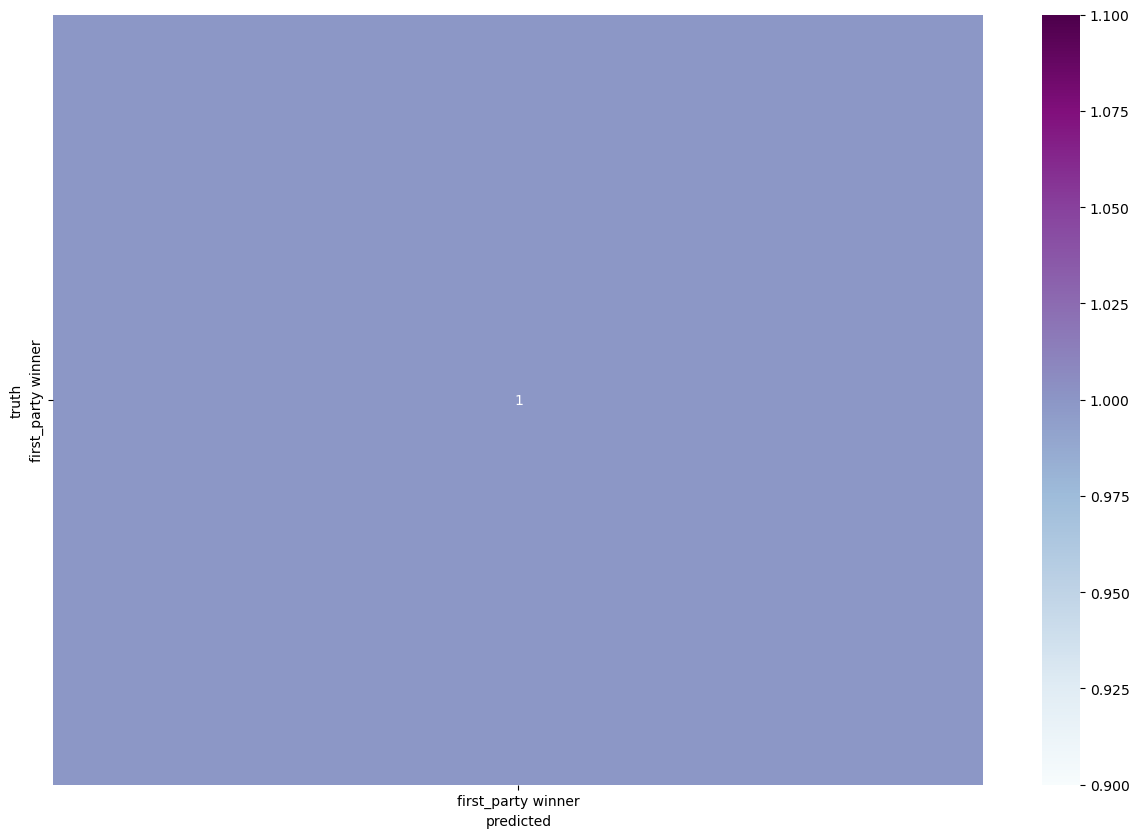

In [239]:
from sklearn.metrics import confusion_matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predsize)
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='BuPu')
plt.xlabel('predicted')
plt.ylabel('truth')